# Applying Data Science in Real Estate

## Installing packages

In [1]:
pip install datatile

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pyproj

Note: you may need to restart the kernel to use updated packages.


In [185]:
from datatile.summary.df import DataFrameSummary
import pyproj
import pandas as pd
import numpy as np
import missingno as msno
import csv
import requests
import json
import os
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

## Let's get the housing dataset

In [186]:
##url = 'https://opendata.arcgis.com/api/v3/datasets/ed0468f5e579464b84727a4ab614fd40_0/downloads/data?format=csv&spatialRefId=4326'
url = 'https://opendata.arcgis.com/api/v3/datasets/bf92e51f90a8426cae904ebc15018067_0/downloads/data?format=csv&spatialRefId=4326'
headers =  {}

try:
    response = requests.get(url, headers)
    response.raise_for_status()

except requests.exceptions.HTTPError as APIerror:
    print(error)


In [3]:
## Our data is in bytes, since we downloaded the data as a CSV
print(type(response.content))

<class 'bytes'>


In [4]:
## Let's grab the our proposed filename 'Propery_Boundary_View.csv' from our response 

filename_header = response.headers['Content-Disposition']
filename = filename_header.split('=')[1]
filename = eval(filename)
print(filename)

##tempdf = pd.read_csv(response.text)
##tempdf

Property_Point_View.csv


In [5]:
## In order to write into a  file and download to the proposed directory, we should specify our path using Python path 

folder_path = os.path.abspath(os.curdir)
print(folder_path)
dataset_path = folder_path + "/" + filename
print(dataset_path)

/Users/vmedina13/Documents/DATA PROJECTS/Miami-Properties-main
/Users/vmedina13/Documents/DATA PROJECTS/Miami-Properties-main/Property_Point_View.csv


In [6]:
## Let's write to a file, using our response.iter_content with a 128 as our chunk_size. 
## chunk_size is just a way to read from memory in chunks of 128 bytes, rather than reading all at once.

with open(dataset_path, 'wb') as local_file:
            for chunk in response.iter_content(chunk_size=128):
                  local_file.write(chunk)

In [5]:
## Let's open our CSV file, and re## Let's write to a file, using our response.iter_content with a 128 as our chunk_size. 
## chunk_size is just a way to read from memory in chunks of 128 bytes, rather than reading all at once.

with open('Property_Point_View.csv') as csv_file:
    reader = csv.reader(csv_file)

In [6]:
## We pass our CSV file into pd.read_csv to load our DataFrame

result = pd.read_csv('Property_Point_View.csv')
print(type(result))

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (8,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>


# Data Wrangling

In [7]:
## View all columns
pd.set_option('max_columns', None)

In [8]:
## Let's view the data frame
result.head()

,X,Y,OBJECTID,FOLIO,TTRRSS,X_COORD,Y_COORD,TRUE_SITE_ADDR,TRUE_SITE_UNIT,TRUE_SITE_CITY,TRUE_SITE_ZIP_CODE,TRUE_MAILING_ADDR1,TRUE_MAILING_ADDR2,TRUE_MAILING_ADDR3,TRUE_MAILING_CITY,TRUE_MAILING_STATE,TRUE_MAILING_ZIP_CODE,TRUE_MAILING_COUNTRY,TRUE_OWNER1,TRUE_OWNER2,TRUE_OWNER3,CONDO_FLAG,PARENT_FOLIO,DOR_CODE_CUR,DOR_DESC,SUBDIVISION,BEDROOM_COUNT,BATHROOM_COUNT,HALF_BATHROOM_COUNT,FLOOR_COUNT,UNIT_COUNT,BUILDING_ACTUAL_AREA,BUILDING_HEATED_AREA,LOT_SIZE,YEAR_BUILT,ASSESSMENT_YEAR_CUR,ASSESSED_VAL_CUR,DOS_1,PRICE_1,LEGAL,PID,DATEOFSALE_UTC
0,-80.192951,25.772241,1,1.010000e+11,544101,921757.4,523723.3,NaN,NaN,Miami,33131-2103,1000 BRICKELL AVE STE 400,NaN,NaN,MIAMI,FL,33131,USA,16 SE 2ND STREET DOWNTOWN,INVESTMENT LLC,NaN,N,NaN,2865.0,PARKING LOT/MOBILE HOME PARK : PARKING LOT,10100000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60198.0,0.0,2022.0,27998859.0,20210623.0,46000000.0,MIAMI NORTH PB B-41 BEG X OF E/L OF SO MIAMI A...,538415,2021/06/23 04:00:00+00
1,-80.226520,25.812590,2,1.010000e+11,534122,910623.9,538322.4,245 NE 1 AVE,NaN,Miami,33132-0000,701 NW 1 CT STE 1700,NaN,NaN,MIAMI,FL,33136-3902,NaN,MIAMI-DADE COUNTY,MIAMI-DADE TRANSIT,NaN,N,NaN,8617.0,COUNTY : COMMERCIAL - TOTAL VALUE,10100000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022.0,347164191.0,NaN,NaN,ALL THAT PORTION OF METRO RAIL LYG WITHIN THE ...,252216,NaN
2,-80.215757,25.795276,3,1.010000e+11,534126,914202.3,532050.4,1250 NW 21 ST,NaN,Miami,33142-7753,401 WILSHIRE BLVD #1070,NaN,NaN,SANTA MONICA,CA,90401,USA,SANTA CLARA APARTMENTS I LLC,NaN,NaN,N,NaN,101.0,RESIDENTIAL - SINGLE FAMILY : 1 UNIT,10100000.0,0.0,352.0,0.0,9.0,208.0,169280.0,169280.0,0.0,2003.0,2022.0,5900000.0,NaN,NaN,SANTA CLARA STATION PB 126-42 PORT OF TRACT A ...,269265,NaN
3,-80.216443,25.795682,4,1.010000e+11,534126,913975.6,532196.4,1250 NW 21 ST,NaN,Miami,NaN,401 WILSHIRE BLVD #1070,NaN,NaN,SANTA MONICA,CA,90401,USA,LINCOLN SANTA CLARA II LLC,NaN,NaN,N,NaN,9017.0,LEASEHOLD INTEREST : COMMERCIAL - TOTAL VALUE,10100000.0,0.0,360.0,0.0,17.0,204.0,293744.0,293744.0,0.0,2005.0,2022.0,7400000.0,NaN,NaN,SANTA CLARA STATION PB 126-42 PORT OF TRACT A ...,659584,NaN
4,-80.192259,25.772326,5,1.010000e+11,544101,921985.2,523755.3,60 SE 2 ST,NaN,Miami,33131-2103,1000 BRICKELL AVE STE 400,NaN,NaN,MIAMI,FL,33131,USA,16 SE 2ND STREET DOWNTOWN,INVESTMENT LLC,NaN,N,NaN,1081.0,VACANT LAND - COMMERCIAL : VACANT LAND,10100000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16384.0,0.0,2022.0,7618560.0,20210623.0,46000000.0,MIAMI NORTH PB B-41 BEG 12.2FT W OF X OF S/L O...,567281,2021/06/23 04:00:00+00


In [9]:
## Fixing the X and Y coordinates
result = result.rename({'X':'Y','Y':'X'}, axis=1)

## Moving X in the first column
first = result['X']
result.drop(labels=['X'],axis=1,inplace=True)
result.insert(0,'X',first)

In [10]:
## Delete unnecessary columns
##Drop redundant columns
result.drop(['OBJECTID','TTRRSS','X_COORD','Y_COORD'],axis=1,inplace=True)

In [11]:
##Drop mailing address- not the property address
result.drop(['TRUE_MAILING_ADDR1','TRUE_MAILING_ADDR2','TRUE_MAILING_ADDR3',
             'TRUE_MAILING_CITY','TRUE_MAILING_STATE','TRUE_MAILING_ZIP_CODE',
             'TRUE_MAILING_COUNTRY'],axis=1,inplace=True)

In [12]:
result.drop(['LEGAL','PID'],axis=1,inplace=True)

In [13]:
## Let's convert our DATEOFSALE_UTC to a date_time
result['DATEOFSALE_UTC'] = pd.to_datetime(result['DATEOFSALE_UTC'], format = '%Y-%m-%d %H:%M:%S')

In [14]:
## Let's go ahead and expand the year/month/day into 3 different columns 
result['DAY_OF_SALE'] = result['DATEOFSALE_UTC'].dt.day
result['MONTH_OF_SALE'] = result['DATEOFSALE_UTC'].dt.month
result['YEAR_OF_SALE'] = result['DATEOFSALE_UTC'].dt.year

In [15]:
#Rename columns
result = result.rename(
    {'TRUE_SITE_ADDR':'ADDRESS',
     'TRUE_SITE_UNIT':'UNIT',
     'TRUE_SITE_CITY':'CITY',
     'TRUE_SITE_ZIP_CODE':'ZIP_CODE',
     'TRUE_OWNER1':'OWNER1',
     'TRUE_OWNER2':'OWNER2',
     'TRUE_OWNER3':'OWNER3',
     'DOR_CODE_CUR':'DESC_CODE',    
     'DOR_DESC':'DESC',
     'BEDROOM_COUNT':'BEDROOMS',
     'BATHROOM_COUNT':'BATHROOMS',
     'FLOOR_COUNT':'FLOORS',
     'UNIT_COUNT':'UNITS',
     'BUILDING_ACTUAL_AREA':'ACTUAL_AREA',
     'BUILDING_HEATED_AREA':'HEATED_AREA',
     'HALF_BATHROOM_COUNT':'HALF_BATHROOMS',
     'PRICE_1':'PRICE',
     'DATEOFSALE_UTC':'DATE_SOLD'
     }, 
    axis=1)

In [16]:
# Let's create a column of days since house is sold
from datetime import datetime
result['TODAY']  = datetime.today().strftime('%Y-%m-%d')
result['DATE_SOLD'] = result['DATE_SOLD'].dt.strftime('%Y-%m-%d')

result['DATE_SOLD'] = pd.to_datetime(result['DATE_SOLD'])
result['TODAY'] = pd.to_datetime(result['TODAY'])

result['DAYS_SINCE_SOLD'] = result['TODAY'] - result['DATE_SOLD']
result["DAYS_SINCE_SOLD"] = result["DAYS_SINCE_SOLD"].dt.days

In [17]:
#Remove the last 4 digits in the zip code
result['ZIP_CODE'] = result['ZIP_CODE'].str[:5]
result = result[result['ZIP_CODE'] != '-']

In [18]:
#Drop NAs
result = result.dropna(subset=['PRICE'])
result = result.dropna(subset=['ADDRESS'])
result = result.dropna(subset=['ZIP_CODE'])

In [19]:
result

,X,Y,FOLIO,ADDRESS,UNIT,CITY,ZIP_CODE,OWNER1,OWNER2,OWNER3,CONDO_FLAG,PARENT_FOLIO,DESC_CODE,DESC,SUBDIVISION,BEDROOMS,BATHROOMS,HALF_BATHROOMS,FLOORS,UNITS,ACTUAL_AREA,HEATED_AREA,LOT_SIZE,YEAR_BUILT,ASSESSMENT_YEAR_CUR,ASSESSED_VAL_CUR,DOS_1,PRICE,DATE_SOLD,DAY_OF_SALE,MONTH_OF_SALE,YEAR_OF_SALE,TODAY,DAYS_SINCE_SOLD
4,25.772326,-80.192259,1.010000e+11,60 SE 2 ST,NaN,Miami,33131,16 SE 2ND STREET DOWNTOWN,INVESTMENT LLC,NaN,N,NaN,1081.0,VACANT LAND - COMMERCIAL : VACANT LAND,10100000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16384.0,0.0,2022.0,7618560.0,20210623.0,46000000.0,2021-06-23,23.0,6.0,2021.0,2022-04-09,290.0
8,25.772266,-80.194221,1.010000e+11,200 S MIAMI AVE,NaN,Miami,33130,MIAMI 2ND STREET PROPERTIES LLC,NaN,NaN,N,NaN,1813.0,OFFICE BUILDING - MULTISTORY : OFFICE BUILDING,10100000.0,0.0,0.0,0.0,2.0,0.0,99974.0,97974.0,51561.0,1999.0,2022.0,30616089.0,20170630.0,37250000.0,2017-06-30,30.0,6.0,2017.0,2022-04-09,1744.0
13,25.769504,-80.195829,1.010000e+11,92 SW 3 ST,NaN,Miami,33130,RIVER FRONT MASTER ASSOCIATION,NaN,NaN,N,NaN,1081.0,VACANT LAND - COMMERCIAL : VACANT LAND,10100000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14212.0,0.0,2022.0,358992.0,20181116.0,424500.0,2018-11-16,16.0,11.0,2018.0,2022-04-09,1240.0
25,25.784634,-80.205088,1.010100e+11,601 NW 11 ST,NaN,Miami,33136,CRISTEC CORPORATION,NaN,NaN,N,NaN,4837.0,WAREHOUSE TERMINAL OR STG : WAREHOUSE OR STORAGE,10101000.0,0.0,0.0,0.0,1.0,0.0,11964.0,11238.0,11291.0,1948.0,2022.0,622361.0,19990701.0,160000.0,1999-07-01,1.0,7.0,1999.0,2022-04-09,8318.0
26,25.784619,-80.205454,1.010100e+11,611 NW 11 ST,NaN,Miami,33136,NKRY CORPORATION,NaN,NaN,N,NaN,4837.0,WAREHOUSE TERMINAL OR STG : WAREHOUSE OR STORAGE,10101000.0,0.0,0.0,0.0,1.0,0.0,7200.0,7200.0,11959.0,1948.0,2022.0,423153.0,19990401.0,125000.0,1999-04-01,1.0,4.0,1999.0,2022-04-09,8409.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927762,25.558388,-80.338885,3.660160e+12,9021 SW 227 ST 8,8,Cutler Bay,33190,ROGELIO BRANDT CASTRO LE,GLORIA ABARCA DE BRANDT LE,REM MARIE DEL MAR BRANDT,Y,3.660160e+12,407.0,RESIDENTIAL - TOTAL VALUE : CONDOMINIUM - RESI...,366016024.0,2.0,2.0,1.0,0.0,0.0,1290.0,1290.0,0.0,2011.0,2022.0,160200.0,20181012.0,100.0,2018-10-12,12.0,10.0,2018.0,2022-04-09,1275.0
927763,25.558388,-80.338885,3.660160e+12,9021 SW 227 ST 9,9,Cutler Bay,33190,ALDILA 1 LLC,NaN,NaN,Y,3.660160e+12,407.0,RESIDENTIAL - TOTAL VALUE : CONDOMINIUM - RESI...,366016024.0,3.0,2.0,1.0,0.0,0.0,1325.0,1325.0,0.0,2011.0,2022.0,177000.0,20160826.0,183500.0,2016-08-26,26.0,8.0,2016.0,2022-04-09,2052.0
927764,25.558388,-80.338885,3.660160e+12,9021 SW 227 ST 10,10,Cutler Bay,33190,LA SERENA II LLC,NaN,NaN,Y,3.660160e+12,407.0,RESIDENTIAL - TOTAL VALUE : CONDOMINIUM - RESI...,366016024.0,3.0,2.0,1.0,0.0,0.0,1325.0,1325.0,0.0,2011.0,2022.0,177000.0,20111130.0,150000.0,2011-11-30,30.0,11.0,2011.0,2022-04-09,3783.0
927765,25.558388,-80.338885,3.660160e+12,9021 SW 227 ST 11,11,Cutler Bay,33190,HABITA 1 LLC,NaN,NaN,Y,3.660160e+12,407.0,RESIDENTIAL - TOTAL VALUE : CONDOMINIUM - RESI...,366016024.0,3.0,3.0,0.0,0.0,0.0,1459.0,1459.0,0.0,2011.0,2022.0,180900.0,20111130.0,160000.0,2011-11-30,30.0,11.0,2011.0,2022-04-09,3783.0


In [20]:
#Let's look at the data
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840618 entries, 4 to 927766
Data columns (total 34 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   X                    840618 non-null  float64       
 1   Y                    840618 non-null  float64       
 2   FOLIO                840618 non-null  float64       
 3   ADDRESS              840618 non-null  object        
 4   UNIT                 338079 non-null  object        
 5   CITY                 840618 non-null  object        
 6   ZIP_CODE             840618 non-null  object        
 7   OWNER1               840618 non-null  object        
 8   OWNER2               306284 non-null  object        
 9   OWNER3               48865 non-null   object        
 10  CONDO_FLAG           840618 non-null  object        
 11  PARENT_FOLIO         338637 non-null  float64       
 12  DESC_CODE            840618 non-null  float64       
 13  DESC          

In [288]:
result

,X,Y,FOLIO,ADDRESS,UNIT,CITY,ZIP_CODE,OWNER1,OWNER2,OWNER3,CONDO_FLAG,PARENT_FOLIO,DESC_CODE,DESC,BEDROOMS,BATHROOMS,HALF_BATHROOM_COUNT,FLOORS,UNITS,ACTUAL_AREA,HEATED_AREA,LOT_SIZE,YEAR_BUILT,ASSESSED_VAL_CUR,PRICE,DATE_SOLD,DAY_OF_SALE,MONTH_OF_SALE,YEAR_OF_SALE,TODAY,DAYS_SINCE_SOLD
4,25.772326,-80.192259,1.010000e+11,60 SE 2 ST,NaN,Miami,33131,16 SE 2ND STREET DOWNTOWN,INVESTMENT LLC,NaN,N,NaN,1081.0,VACANT LAND - COMMERCIAL : VACANT LAND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16384.0,0.0,7618560.0,46000000.0,2021-06-23,23.0,6.0,2021.0,2022-04-08,289.0
8,25.772266,-80.194221,1.010000e+11,200 S MIAMI AVE,NaN,Miami,33130,MIAMI 2ND STREET PROPERTIES LLC,NaN,NaN,N,NaN,1813.0,OFFICE BUILDING - MULTISTORY : OFFICE BUILDING,0.0,0.0,0.0,2.0,0.0,99974.0,97974.0,51561.0,1999.0,30616089.0,37250000.0,2017-06-30,30.0,6.0,2017.0,2022-04-08,1743.0
13,25.769504,-80.195829,1.010000e+11,92 SW 3 ST,NaN,Miami,33130,RIVER FRONT MASTER ASSOCIATION,NaN,NaN,N,NaN,1081.0,VACANT LAND - COMMERCIAL : VACANT LAND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14212.0,0.0,358992.0,424500.0,2018-11-16,16.0,11.0,2018.0,2022-04-08,1239.0
25,25.784634,-80.205088,1.010100e+11,601 NW 11 ST,NaN,Miami,33136,CRISTEC CORPORATION,NaN,NaN,N,NaN,4837.0,WAREHOUSE TERMINAL OR STG : WAREHOUSE OR STORAGE,0.0,0.0,0.0,1.0,0.0,11964.0,11238.0,11291.0,1948.0,622361.0,160000.0,1999-07-01,1.0,7.0,1999.0,2022-04-08,8317.0
26,25.784619,-80.205454,1.010100e+11,611 NW 11 ST,NaN,Miami,33136,NKRY CORPORATION,NaN,NaN,N,NaN,4837.0,WAREHOUSE TERMINAL OR STG : WAREHOUSE OR STORAGE,0.0,0.0,0.0,1.0,0.0,7200.0,7200.0,11959.0,1948.0,423153.0,125000.0,1999-04-01,1.0,4.0,1999.0,2022-04-08,8408.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927762,25.558388,-80.338885,3.660160e+12,9021 SW 227 ST 8,8,Cutler Bay,33190,ROGELIO BRANDT CASTRO LE,GLORIA ABARCA DE BRANDT LE,REM MARIE DEL MAR BRANDT,Y,3.660160e+12,407.0,RESIDENTIAL - TOTAL VALUE : CONDOMINIUM - RESI...,2.0,2.0,1.0,0.0,0.0,1290.0,1290.0,0.0,2011.0,160200.0,100.0,2018-10-12,12.0,10.0,2018.0,2022-04-08,1274.0
927763,25.558388,-80.338885,3.660160e+12,9021 SW 227 ST 9,9,Cutler Bay,33190,ALDILA 1 LLC,NaN,NaN,Y,3.660160e+12,407.0,RESIDENTIAL - TOTAL VALUE : CONDOMINIUM - RESI...,3.0,2.0,1.0,0.0,0.0,1325.0,1325.0,0.0,2011.0,177000.0,183500.0,2016-08-26,26.0,8.0,2016.0,2022-04-08,2051.0
927764,25.558388,-80.338885,3.660160e+12,9021 SW 227 ST 10,10,Cutler Bay,33190,LA SERENA II LLC,NaN,NaN,Y,3.660160e+12,407.0,RESIDENTIAL - TOTAL VALUE : CONDOMINIUM - RESI...,3.0,2.0,1.0,0.0,0.0,1325.0,1325.0,0.0,2011.0,177000.0,150000.0,2011-11-30,30.0,11.0,2011.0,2022-04-08,3782.0
927765,25.558388,-80.338885,3.660160e+12,9021 SW 227 ST 11,11,Cutler Bay,33190,HABITA 1 LLC,NaN,NaN,Y,3.660160e+12,407.0,RESIDENTIAL - TOTAL VALUE : CONDOMINIUM - RESI...,3.0,3.0,0.0,0.0,0.0,1459.0,1459.0,0.0,2011.0,180900.0,160000.0,2011-11-30,30.0,11.0,2011.0,2022-04-08,3782.0


# Single Family Data

We are going to filter our dataset to only residential single family units. Analysis should be interesting!

In [105]:
## Let's filter the dataset by single family homes!

single_family = result[result['DESC'] == 'RESIDENTIAL - SINGLE FAMILY : 1 UNIT']
single_family.head()

,X,Y,FOLIO,ADDRESS,UNIT,CITY,ZIP_CODE,OWNER1,OWNER2,OWNER3,CONDO_FLAG,PARENT_FOLIO,DESC_CODE,DESC,SUBDIVISION,BEDROOMS,BATHROOMS,HALF_BATHROOMS,FLOORS,UNITS,ACTUAL_AREA,HEATED_AREA,LOT_SIZE,YEAR_BUILT,ASSESSMENT_YEAR_CUR,ASSESSED_VAL_CUR,DOS_1,PRICE,DATE_SOLD,DAY_OF_SALE,MONTH_OF_SALE,YEAR_OF_SALE,TODAY,DAYS_SINCE_SOLD
178,25.783310,-80.202725,1.010208e+11,464 NW 10 ST,NaN,Miami,33136,SYNERGY CONSULTANTS GROUP LLC TRS,LAND TRUST SCG723,NaN,N,NaN,101.0,RESIDENTIAL - SINGLE FAMILY : 1 UNIT,10102080.0,1.0,1.0,0.0,1.0,1.0,901.0,901.0,2500.0,1925.0,2022.0,48835.0,20190724.0,60100.0,2019-07-24,24.0,7.0,2019.0,2022-04-09,990.0
221,25.781325,-80.201086,1.010407e+11,733 NW 4 AVE,NaN,Miami,33136,J AND O PROPERTY 1 LLC,NaN,NaN,N,NaN,101.0,RESIDENTIAL - SINGLE FAMILY : 1 UNIT,10104070.0,4.0,1.0,0.0,1.0,1.0,1065.0,1065.0,2500.0,1954.0,2022.0,182948.0,20190717.0,200000.0,2019-07-17,17.0,7.0,2019.0,2022-04-09,997.0
227,25.780962,-80.200692,1.010407e+11,353 NW 7 ST,NaN,Miami,33136,FRANKIE MARIE LEE,NaN,NaN,N,NaN,101.0,RESIDENTIAL - SINGLE FAMILY : 1 UNIT,10104070.0,4.0,2.0,1.0,2.0,1.0,1710.0,2280.0,7500.0,1940.0,2022.0,406976.0,20161103.0,0.0,2016-11-03,3.0,11.0,2016.0,2022-04-09,1983.0
250,25.780777,-80.203437,1.010409e+11,521 NW 7 ST,NaN,Miami,33136,SHAHEED SAMUEL,NaN,NaN,N,NaN,101.0,RESIDENTIAL - SINGLE FAMILY : 1 UNIT,10104090.0,3.0,2.0,0.0,1.0,1.0,1784.0,1455.0,3750.0,1920.0,2022.0,150768.0,20190306.0,101000.0,2019-03-06,6.0,3.0,2019.0,2022-04-09,1130.0
443,25.777089,-80.201297,1.010900e+11,401 NW 3 ST,NaN,Miami,33128,DADE HERITAGE TRUST INC,NaN,NaN,N,NaN,101.0,RESIDENTIAL - SINGLE FAMILY : 1 UNIT,10109000.0,2.0,1.0,0.0,1.0,1.0,1254.0,1254.0,7500.0,1925.0,2022.0,187576.0,20201016.0,0.0,2020-10-16,16.0,10.0,2020.0,2022-04-09,540.0


In [106]:
#Here is what our dataset summary
single_family.describe()

,X,Y,FOLIO,PARENT_FOLIO,DESC_CODE,SUBDIVISION,BEDROOMS,BATHROOMS,HALF_BATHROOMS,FLOORS,UNITS,ACTUAL_AREA,HEATED_AREA,LOT_SIZE,YEAR_BUILT,ASSESSMENT_YEAR_CUR,ASSESSED_VAL_CUR,DOS_1,PRICE,DAY_OF_SALE,MONTH_OF_SALE,YEAR_OF_SALE,DAYS_SINCE_SOLD
count,308180.000000,308180.000000,3.081800e+05,0.0,308180.0,3.081050e+05,308180.000000,308180.000000,308180.000000,308180.000000,308180.000000,308180.000000,308180.000000,3.081800e+05,308180.000000,308180.0,3.081800e+05,3.081800e+05,3.081800e+05,308180.000000,308180.000000,308180.000000,308180.000000
mean,25.766678,-80.304701,2.195394e+12,NaN,101.0,2.195501e+08,3.212554,1.993505,0.095538,1.225939,1.005481,2283.616338,1901.168872,1.050525e+04,1967.231868,2022.0,3.410239e+05,2.008506e+07,2.607802e+05,10.453514,6.649458,2008.438150,4870.894201
std,0.127871,0.087070,1.269656e+12,NaN,0.0,1.269625e+08,0.877452,0.927813,0.398600,51.205214,0.076249,1240.151559,1009.382508,5.205424e+04,28.985394,0.0,7.200187e+05,1.178497e+05,8.652531e+05,10.342889,3.394121,11.785322,4309.152450
min,25.396944,-80.561531,1.010208e+11,NaN,101.0,1.010208e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1901.000000,2022.0,1.176300e+04,1.927040e+07,0.000000e+00,1.000000,1.000000,1927.000000,19.000000
25%,25.680928,-80.367094,6.212602e+11,NaN,101.0,6.212602e+07,3.000000,1.000000,0.000000,1.000000,1.000000,1562.000000,1326.000000,6.550000e+03,1953.000000,2022.0,1.450180e+05,2.001080e+07,1.000000e+02,1.000000,4.000000,2001.000000,1316.000000
50%,25.760167,-80.299767,3.032060e+12,NaN,101.0,3.032060e+08,3.000000,2.000000,0.000000,1.000000,1.000000,2002.000000,1673.000000,7.875000e+03,1961.000000,2022.0,2.210930e+05,2.012111e+07,1.045000e+05,7.000000,7.000000,2012.000000,3441.000000
75%,25.877362,-80.235714,3.059080e+12,NaN,101.0,3.059080e+08,4.000000,2.000000,0.000000,1.000000,1.000000,2632.000000,2159.000000,1.012500e+04,1981.000000,2022.0,3.345742e+05,2.018090e+07,2.936468e+05,20.000000,10.000000,2018.000000,7556.000000
max,25.974915,-80.118765,3.660100e+12,NaN,101.0,3.660100e+08,32.000000,19.000000,100.000000,20101.000000,3.000000,40230.000000,31270.000000,2.787210e+07,9999.000000,2022.0,4.919218e+07,2.022032e+07,8.800000e+07,31.000000,12.000000,2022.000000,34707.000000


In [107]:
#Overview of single family dataset. It's time to delete some columns!
single_family.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308180 entries, 178 to 575077
Data columns (total 34 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   X                    308180 non-null  float64       
 1   Y                    308180 non-null  float64       
 2   FOLIO                308180 non-null  float64       
 3   ADDRESS              308180 non-null  object        
 4   UNIT                 87 non-null      object        
 5   CITY                 308180 non-null  object        
 6   ZIP_CODE             308180 non-null  object        
 7   OWNER1               308180 non-null  object        
 8   OWNER2               129501 non-null  object        
 9   OWNER3               22107 non-null   object        
 10  CONDO_FLAG           308180 non-null  object        
 11  PARENT_FOLIO         0 non-null       float64       
 12  DESC_CODE            308180 non-null  float64       
 13  DESC        

In [108]:
single_family = single_family.drop(['PARENT_FOLIO','UNIT'],axis=1)
single_family = single_family.drop(['SUBDIVISION'],axis=1)

In [109]:
#Condo flags is not good data.
single_family['CONDO_FLAG'].value_counts()
single_family = single_family.drop(['CONDO_FLAG'],axis=1)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PRICE', ylabel='Density'>

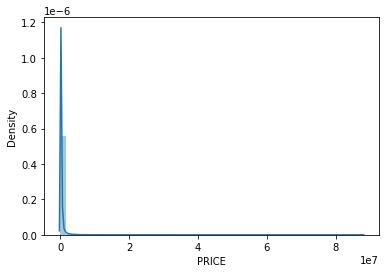

In [66]:
#This is the distribution of the residential housing prices... yuck!
sns.distplot(single_family['PRICE'])

In [110]:
#About 1/3rd of the data is unusable...
single_family['PRICE'].value_counts()

100.0       63366
0.0         40162
250000.0     1600
350000.0     1555
300000.0     1507
            ...  
826800.0        1
95377.0         1
67220.0         1
124933.0        1
602700.0        1
Name: PRICE, Length: 11263, dtype: int64

In [111]:
#Let's remove the 0's and 100's
single_family = single_family[(single_family['PRICE']!=0)&(single_family['PRICE']!=100)]
single_family

,X,Y,FOLIO,ADDRESS,CITY,ZIP_CODE,OWNER1,OWNER2,OWNER3,DESC_CODE,DESC,BEDROOMS,BATHROOMS,HALF_BATHROOMS,FLOORS,UNITS,ACTUAL_AREA,HEATED_AREA,LOT_SIZE,YEAR_BUILT,ASSESSMENT_YEAR_CUR,ASSESSED_VAL_CUR,DOS_1,PRICE,DATE_SOLD,DAY_OF_SALE,MONTH_OF_SALE,YEAR_OF_SALE,TODAY,DAYS_SINCE_SOLD
178,25.783310,-80.202725,1.010208e+11,464 NW 10 ST,Miami,33136,SYNERGY CONSULTANTS GROUP LLC TRS,LAND TRUST SCG723,NaN,101.0,RESIDENTIAL - SINGLE FAMILY : 1 UNIT,1.0,1.0,0.0,1.0,1.0,901.0,901.0,2500.0,1925.0,2022.0,48835.0,20190724.0,60100.0,2019-07-24,24.0,7.0,2019.0,2022-04-09,990.0
221,25.781325,-80.201086,1.010407e+11,733 NW 4 AVE,Miami,33136,J AND O PROPERTY 1 LLC,NaN,NaN,101.0,RESIDENTIAL - SINGLE FAMILY : 1 UNIT,4.0,1.0,0.0,1.0,1.0,1065.0,1065.0,2500.0,1954.0,2022.0,182948.0,20190717.0,200000.0,2019-07-17,17.0,7.0,2019.0,2022-04-09,997.0
250,25.780777,-80.203437,1.010409e+11,521 NW 7 ST,Miami,33136,SHAHEED SAMUEL,NaN,NaN,101.0,RESIDENTIAL - SINGLE FAMILY : 1 UNIT,3.0,2.0,0.0,1.0,1.0,1784.0,1455.0,3750.0,1920.0,2022.0,150768.0,20190306.0,101000.0,2019-03-06,6.0,3.0,2019.0,2022-04-09,1130.0
741,25.776241,-80.207614,1.020003e+11,227 NW 8 AVE,Miami,33128,RETALCO TWO LLC,NaN,NaN,101.0,RESIDENTIAL - SINGLE FAMILY : 1 UNIT,2.0,1.0,0.0,1.0,1.0,1170.0,868.0,5000.0,1925.0,2022.0,296441.0,20130918.0,182300.0,2013-09-18,18.0,9.0,2013.0,2022-04-09,3125.0
777,25.775494,-80.204668,1.020006e+11,134 NW 6 AVE,Miami,33128,IGLESIA EVANG INT'L SOLDADOS,DE LA CRUZ DE CRISTO INC,NaN,101.0,RESIDENTIAL - SINGLE FAMILY : 1 UNIT,4.0,2.0,0.0,2.0,1.0,1558.0,1788.0,5000.0,1926.0,2022.0,160157.0,19760801.0,30000.0,1976-08-01,1.0,8.0,1976.0,2022-04-09,16687.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575071,25.576518,-80.319552,3.660100e+12,20561 SW 79 CT,Cutler Bay,33189,ELOY NUNEZ,MARIBEL DEL VALLE,NaN,101.0,RESIDENTIAL - SINGLE FAMILY : 1 UNIT,4.0,4.0,0.0,2.0,1.0,3583.0,2600.0,9750.0,2019.0,2022.0,455210.0,20190521.0,526100.0,2019-05-21,21.0,5.0,2019.0,2022-04-09,1054.0
575072,25.576309,-80.319537,3.660100e+12,20581 SW 79 CT,Cutler Bay,33189,FELIX BERNAL,ASTRID JOSEFINA MORALES,NaN,101.0,RESIDENTIAL - SINGLE FAMILY : 1 UNIT,5.0,5.0,0.0,2.0,1.0,4346.0,3385.0,10125.0,2020.0,2022.0,512336.0,20201207.0,590000.0,2020-12-07,7.0,12.0,2020.0,2022-04-09,488.0
575073,25.576099,-80.319501,3.660100e+12,20601 SW 79 CT,Cutler Bay,33189,ARIEL ARMANDO NUNEZ,VIDA C NIETO BALUJA,NaN,101.0,RESIDENTIAL - SINGLE FAMILY : 1 UNIT,5.0,5.0,0.0,2.0,1.0,4346.0,3385.0,11537.0,2019.0,2022.0,524793.0,20191216.0,602700.0,2019-12-16,16.0,12.0,2019.0,2022-04-09,845.0
575075,25.575656,-80.319495,3.660100e+12,20641 SW 79 CT,Cutler Bay,33189,ALEXIS ZAMUDIO,ORLANDO ALFONSO VANEGAS,NaN,101.0,RESIDENTIAL - SINGLE FAMILY : 1 UNIT,4.0,4.0,1.0,2.0,1.0,3682.0,2740.0,10346.0,2019.0,2022.0,425452.0,20191115.0,579900.0,2019-11-15,15.0,11.0,2019.0,2022-04-09,876.0


In [112]:
#Let's make some drastic cuts...
single_family = single_family[single_family['PRICE']<=3000000]
single_family = single_family[single_family['PRICE']>=100000]

In [113]:
#That looks better.
single_family['PRICE'].value_counts()

In [176]:
single_family.head()

,X,Y,FOLIO,ADDRESS,CITY,BEDROOMS,BATHROOMS,HALF_BATHROOMS,FLOORS,UNITS,ACTUAL_AREA,HEATED_AREA,LOT_SIZE,YEAR_BUILT,DOS_1,DATE_SOLD,DAY_OF_SALE,MONTH_OF_SALE,YEAR_OF_SALE,DAYS_SINCE_SOLD,AGE,PRICE,ZIP_CODE_33012,ZIP_CODE_33013,ZIP_CODE_33014,ZIP_CODE_33015,ZIP_CODE_33016,ZIP_CODE_33018,ZIP_CODE_33030,ZIP_CODE_33031,ZIP_CODE_33032,ZIP_CODE_33033,ZIP_CODE_33034,ZIP_CODE_33035,ZIP_CODE_33054,ZIP_CODE_33055,ZIP_CODE_33056,ZIP_CODE_33125,ZIP_CODE_33126,ZIP_CODE_33127,ZIP_CODE_33128,ZIP_CODE_33129,ZIP_CODE_33130,ZIP_CODE_33132,ZIP_CODE_33133,ZIP_CODE_33134,ZIP_CODE_33135,ZIP_CODE_33136,ZIP_CODE_33137,ZIP_CODE_33138,ZIP_CODE_33139,ZIP_CODE_33140,ZIP_CODE_33141,ZIP_CODE_33142,ZIP_CODE_33143,ZIP_CODE_33144,ZIP_CODE_33145,ZIP_CODE_33146,ZIP_CODE_33147,ZIP_CODE_33149,ZIP_CODE_33150,ZIP_CODE_33154,ZIP_CODE_33155,ZIP_CODE_33156,ZIP_CODE_33157,ZIP_CODE_33158,ZIP_CODE_33160,ZIP_CODE_33161,ZIP_CODE_33162,ZIP_CODE_33165,ZIP_CODE_33166,ZIP_CODE_33167,ZIP_CODE_33168,ZIP_CODE_33169,ZIP_CODE_33170,ZIP_CODE_33172,ZIP_CODE_33173,ZIP_CODE_33174,ZIP_CODE_33175,ZIP_CODE_33176,ZIP_CODE_33177,ZIP_CODE_33178,ZIP_CODE_33179,ZIP_CODE_33180,ZIP_CODE_33181,ZIP_CODE_33182,ZIP_CODE_33183,ZIP_CODE_33184,ZIP_CODE_33185,ZIP_CODE_33186,ZIP_CODE_33187,ZIP_CODE_33189,ZIP_CODE_33190,ZIP_CODE_33193,ZIP_CODE_33194,ZIP_CODE_33196
221,25.781325,-80.201086,1.010407e+11,733 NW 4 AVE,Miami,4.0,1.0,0.0,1.0,1.0,1065.0,1065.0,2500.0,1954.0,20190717.0,2019-07-17,17.0,7.0,2019.0,997.0,68.0,200000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
250,25.780777,-80.203437,1.010409e+11,521 NW 7 ST,Miami,3.0,2.0,0.0,1.0,1.0,1784.0,1455.0,3750.0,1920.0,20190306.0,2019-03-06,6.0,3.0,2019.0,1130.0,102.0,101000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
741,25.776241,-80.207614,1.020003e+11,227 NW 8 AVE,Miami,2.0,1.0,0.0,1.0,1.0,1170.0,868.0,5000.0,1925.0,20130918.0,2013-09-18,18.0,9.0,2013.0,3125.0,97.0,182300.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
786,25.775025,-80.205978,1.020006e+11,679 NW 1 ST,Miami,5.0,3.0,0.0,2.0,1.0,1179.0,1179.0,2500.0,1925.0,20071001.0,2007-10-01,1.0,10.0,2007.0,5304.0,97.0,310000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
787,25.774935,-80.205920,1.020006e+11,111 NW 7 AVE,Miami,5.0,3.0,0.0,2.0,1.0,1179.0,1179.0,2500.0,1925.0,20071001.0,2007-10-01,1.0,10.0,2007.0,5304.0,97.0,310000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PRICE_LOG', ylabel='Density'>

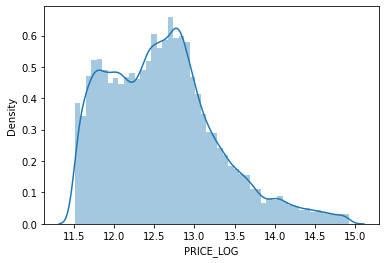

In [73]:
#Since the data is skewed, let's transform the prices into log form
single_family['PRICE_LOG'] = np.log(single_family['PRICE'])

#That looks better
sns.distplot(single_family['PRICE_LOG'])

In [116]:
#There are no duplicate values in the dataset. Hooray!
single_family[single_family.duplicated(keep=False)]

,X,Y,FOLIO,ADDRESS,CITY,ZIP_CODE,OWNER1,OWNER2,OWNER3,DESC_CODE,DESC,BEDROOMS,BATHROOMS,HALF_BATHROOMS,FLOORS,UNITS,ACTUAL_AREA,HEATED_AREA,LOT_SIZE,YEAR_BUILT,ASSESSMENT_YEAR_CUR,ASSESSED_VAL_CUR,DOS_1,PRICE,DATE_SOLD,DAY_OF_SALE,MONTH_OF_SALE,YEAR_OF_SALE,TODAY,DAYS_SINCE_SOLD


## Dropping Columns

In [117]:
#Let's take a look at our dataframe once again
single_family.describe()

,X,Y,FOLIO,DESC_CODE,BEDROOMS,BATHROOMS,HALF_BATHROOMS,FLOORS,UNITS,ACTUAL_AREA,HEATED_AREA,LOT_SIZE,YEAR_BUILT,ASSESSMENT_YEAR_CUR,ASSESSED_VAL_CUR,DOS_1,PRICE,DAY_OF_SALE,MONTH_OF_SALE,YEAR_OF_SALE,DAYS_SINCE_SOLD
count,153919.000000,153919.000000,1.539190e+05,153919.0,153919.000000,153919.000000,153919.000000,153919.000000,153919.000000,153919.000000,153919.000000,1.539190e+05,153919.000000,153919.0,1.539190e+05,1.539190e+05,1.539190e+05,153919.000000,153919.000000,153919.000000,153919.000000
mean,25.755151,-80.312017,2.236710e+12,101.0,3.317862,2.120209,0.116152,1.383409,1.004736,2421.744989,2011.709094,1.102468e+04,1970.207954,2022.0,3.701494e+05,2.010772e+07,3.921661e+05,11.541447,6.675979,2010.704338,4041.285397
std,0.126635,0.088926,1.247237e+12,0.0,0.864505,0.908466,0.415836,72.454605,0.070525,1168.457835,950.113306,1.495971e+04,21.828121,0.0,4.004129e+05,9.411259e+04,3.795034e+05,10.578924,3.352707,9.411671,3442.433287
min,25.396944,-80.557990,1.010407e+11,101.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1901.000000,2022.0,1.906200e+04,1.971030e+07,1.000000e+05,1.000000,1.000000,1971.000000,26.000000
25%,25.664913,-80.377312,7.220401e+11,101.0,3.000000,2.000000,0.000000,1.000000,1.000000,1668.000000,1418.000000,6.600000e+03,1954.000000,2022.0,1.923300e+05,2.004010e+07,1.735000e+05,1.000000,4.000000,2004.000000,1136.000000
50%,25.746974,-80.313728,3.040120e+12,101.0,3.000000,2.000000,0.000000,1.000000,1.000000,2152.000000,1785.000000,8.000000e+03,1965.000000,2022.0,2.730110e+05,2.014071e+07,2.850000e+05,9.000000,7.000000,2014.000000,2833.000000
75%,25.868422,-80.246486,3.059120e+12,101.0,4.000000,2.000000,0.000000,1.000000,1.000000,2838.000000,2326.000000,1.091513e+04,1989.000000,2022.0,3.959405e+05,2.019023e+07,4.370000e+05,21.000000,10.000000,2019.000000,6673.000000
max,25.974915,-80.118765,3.660100e+12,101.0,32.000000,13.000000,100.000000,20101.000000,3.000000,37240.000000,31270.000000,1.428332e+06,2021.000000,2022.0,4.634255e+07,2.022031e+07,3.000000e+06,31.000000,12.000000,2022.000000,18667.000000


In [118]:
#DESC_CODE is the same as DESC. We should remove it.

single_family = single_family.drop("DESC_CODE",axis=1)

In [119]:
#All houses are assessed this year. It's unnecessary
single_family = single_family.drop("ASSESSMENT_YEAR_CUR",axis=1)


In [120]:
single_family = single_family.drop("ASSESSED_VAL_CUR",axis=1)

In [121]:
#We now know what this dataset is
single_family = single_family.drop("DESC",axis=1)

In [122]:
#At this point we don't need the owners
single_family = single_family.drop(["OWNER1","OWNER2","OWNER3"],axis=1)

In [123]:
#We could set a binary column for half bathrooms
single_family['HALF_BATHROOMS'].value_counts()

0.0      136542
1.0       17014
2.0         333
3.0          22
5.0           4
4.0           3
100.0         1
Name: HALF_BATHROOMS, dtype: int64

In [124]:
single_family = single_family[single_family['HALF_BATHROOMS']<3]

In [125]:
single_family.head(10)

,X,Y,FOLIO,ADDRESS,CITY,ZIP_CODE,BEDROOMS,BATHROOMS,HALF_BATHROOMS,FLOORS,UNITS,ACTUAL_AREA,HEATED_AREA,LOT_SIZE,YEAR_BUILT,DOS_1,PRICE,DATE_SOLD,DAY_OF_SALE,MONTH_OF_SALE,YEAR_OF_SALE,TODAY,DAYS_SINCE_SOLD
221,25.781325,-80.201086,1.010407e+11,733 NW 4 AVE,Miami,33136,4.0,1.0,0.0,1.0,1.0,1065.0,1065.0,2500.0,1954.0,20190717.0,200000.0,2019-07-17,17.0,7.0,2019.0,2022-04-09,997.0
250,25.780777,-80.203437,1.010409e+11,521 NW 7 ST,Miami,33136,3.0,2.0,0.0,1.0,1.0,1784.0,1455.0,3750.0,1920.0,20190306.0,101000.0,2019-03-06,6.0,3.0,2019.0,2022-04-09,1130.0
741,25.776241,-80.207614,1.020003e+11,227 NW 8 AVE,Miami,33128,2.0,1.0,0.0,1.0,1.0,1170.0,868.0,5000.0,1925.0,20130918.0,182300.0,2013-09-18,18.0,9.0,2013.0,2022-04-09,3125.0
786,25.775025,-80.205978,1.020006e+11,679 NW 1 ST,Miami,33128,5.0,3.0,0.0,2.0,1.0,1179.0,1179.0,2500.0,1925.0,20071001.0,310000.0,2007-10-01,1.0,10.0,2007.0,2022-04-09,5304.0
787,25.774935,-80.205920,1.020006e+11,111 NW 7 AVE,Miami,33128,5.0,3.0,0.0,2.0,1.0,1179.0,1179.0,2500.0,1925.0,20071001.0,310000.0,2007-10-01,1.0,10.0,2007.0,2022-04-09,5304.0
789,25.774985,-80.205789,1.020006e+11,667 NW 1 ST,Miami,33128,3.0,1.0,0.0,2.0,1.0,2294.0,2816.0,5000.0,1919.0,20210531.0,550000.0,2021-05-31,31.0,5.0,2021.0,2022-04-09,313.0
839,25.774521,-80.205482,1.020009e+11,652 NW 1 ST,Miami,33128,3.0,1.0,0.0,2.0,1.0,1605.0,1917.0,7500.0,1925.0,20021001.0,132000.0,2002-10-01,1.0,10.0,2002.0,2022-04-09,7130.0
857,25.774609,-80.204130,1.020100e+11,566 NW 1 ST,Miami,33128,2.0,1.0,0.0,1.0,1.0,2087.0,1524.0,5000.0,1920.0,20211207.0,615000.0,2021-12-07,7.0,12.0,2021.0,2022-04-09,123.0
859,25.774400,-80.204186,1.020100e+11,29 NW 6 AVE,Miami,33128,3.0,2.0,0.0,1.0,1.0,1932.0,1686.0,5000.0,1935.0,20160919.0,330000.0,2016-09-19,19.0,9.0,2016.0,2022-04-09,2028.0
904,25.773127,-80.204592,1.020103e+11,36 SW 6 AVE,Miami,33130,2.0,1.0,0.0,1.0,1.0,1120.0,896.0,5000.0,1915.0,20000701.0,100000.0,2000-07-01,1.0,7.0,2000.0,2022-04-09,7952.0


In [126]:
#Finally, drop today's date
single_family = single_family.drop(['TODAY'],axis=1)

## Before we go prepare the data...

In [127]:
#Let's create another column to get the age of property
single_family['AGE'] = 2022 - single_family['YEAR_BUILT']
single_family.head()

,X,Y,FOLIO,ADDRESS,CITY,ZIP_CODE,BEDROOMS,BATHROOMS,HALF_BATHROOMS,FLOORS,UNITS,ACTUAL_AREA,HEATED_AREA,LOT_SIZE,YEAR_BUILT,DOS_1,PRICE,DATE_SOLD,DAY_OF_SALE,MONTH_OF_SALE,YEAR_OF_SALE,DAYS_SINCE_SOLD,AGE
221,25.781325,-80.201086,1.010407e+11,733 NW 4 AVE,Miami,33136,4.0,1.0,0.0,1.0,1.0,1065.0,1065.0,2500.0,1954.0,20190717.0,200000.0,2019-07-17,17.0,7.0,2019.0,997.0,68.0
250,25.780777,-80.203437,1.010409e+11,521 NW 7 ST,Miami,33136,3.0,2.0,0.0,1.0,1.0,1784.0,1455.0,3750.0,1920.0,20190306.0,101000.0,2019-03-06,6.0,3.0,2019.0,1130.0,102.0
741,25.776241,-80.207614,1.020003e+11,227 NW 8 AVE,Miami,33128,2.0,1.0,0.0,1.0,1.0,1170.0,868.0,5000.0,1925.0,20130918.0,182300.0,2013-09-18,18.0,9.0,2013.0,3125.0,97.0
786,25.775025,-80.205978,1.020006e+11,679 NW 1 ST,Miami,33128,5.0,3.0,0.0,2.0,1.0,1179.0,1179.0,2500.0,1925.0,20071001.0,310000.0,2007-10-01,1.0,10.0,2007.0,5304.0,97.0
787,25.774935,-80.205920,1.020006e+11,111 NW 7 AVE,Miami,33128,5.0,3.0,0.0,2.0,1.0,1179.0,1179.0,2500.0,1925.0,20071001.0,310000.0,2007-10-01,1.0,10.0,2007.0,5304.0,97.0


In [128]:
single_family['LOT_SIZE'].describe()

count    1.538890e+05
mean     1.101450e+04
std      1.485873e+04
min      1.000000e+00
25%      6.600000e+03
50%      8.000000e+03
75%      1.090850e+04
max      1.428332e+06
Name: LOT_SIZE, dtype: float64

<AxesSubplot:xlabel='DAYS_SINCE_SOLD', ylabel='Count'>

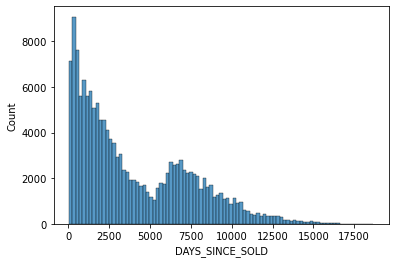

In [129]:
#Some data has .5 bathroom included in the bathrooms column not the half bathroom
sns.histplot(single_family['DAYS_SINCE_SOLD'])

In [130]:
#Remove outliers
single_family = single_family[single_family['BEDROOMS']<8]
single_family = single_family[single_family['BATHROOMS']<8]
single_family = single_family[single_family['BATHROOMS']!=1.5]
single_family = single_family[single_family['BATHROOMS']!=2.5]
single_family = single_family[single_family['BATHROOMS']!=3.5]
single_family = single_family[single_family['BATHROOMS']!=4.5]
single_family = single_family[single_family['BATHROOMS']!=5.5]
single_family = single_family[single_family['FLOORS']<4]
single_family = single_family[single_family['UNITS']>0]
single_family = single_family[single_family['UNITS']<3]
single_family = single_family[single_family['ACTUAL_AREA']<10000]
single_family = single_family[single_family['HEATED_AREA']<10000]
single_family = single_family[single_family['LOT_SIZE']<100000]

In [131]:
#Data is good to go!!!
single_family.head()

,X,Y,FOLIO,ADDRESS,CITY,ZIP_CODE,BEDROOMS,BATHROOMS,HALF_BATHROOMS,FLOORS,UNITS,ACTUAL_AREA,HEATED_AREA,LOT_SIZE,YEAR_BUILT,DOS_1,PRICE,DATE_SOLD,DAY_OF_SALE,MONTH_OF_SALE,YEAR_OF_SALE,DAYS_SINCE_SOLD,AGE
221,25.781325,-80.201086,1.010407e+11,733 NW 4 AVE,Miami,33136,4.0,1.0,0.0,1.0,1.0,1065.0,1065.0,2500.0,1954.0,20190717.0,200000.0,2019-07-17,17.0,7.0,2019.0,997.0,68.0
250,25.780777,-80.203437,1.010409e+11,521 NW 7 ST,Miami,33136,3.0,2.0,0.0,1.0,1.0,1784.0,1455.0,3750.0,1920.0,20190306.0,101000.0,2019-03-06,6.0,3.0,2019.0,1130.0,102.0
741,25.776241,-80.207614,1.020003e+11,227 NW 8 AVE,Miami,33128,2.0,1.0,0.0,1.0,1.0,1170.0,868.0,5000.0,1925.0,20130918.0,182300.0,2013-09-18,18.0,9.0,2013.0,3125.0,97.0
786,25.775025,-80.205978,1.020006e+11,679 NW 1 ST,Miami,33128,5.0,3.0,0.0,2.0,1.0,1179.0,1179.0,2500.0,1925.0,20071001.0,310000.0,2007-10-01,1.0,10.0,2007.0,5304.0,97.0
787,25.774935,-80.205920,1.020006e+11,111 NW 7 AVE,Miami,33128,5.0,3.0,0.0,2.0,1.0,1179.0,1179.0,2500.0,1925.0,20071001.0,310000.0,2007-10-01,1.0,10.0,2007.0,5304.0,97.0


# Exploratory Data Analysis

In [205]:
#Let's look at what's in our dataset to get a better understanding of how we should do our model.
single_family.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152996 entries, 221 to 575076
Data columns (total 96 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   X                152996 non-null  float64       
 1   Y                152996 non-null  float64       
 2   FOLIO            152996 non-null  float64       
 3   ADDRESS          152996 non-null  object        
 4   CITY             152996 non-null  object        
 5   BEDROOMS         152996 non-null  float64       
 6   BATHROOMS        152996 non-null  float64       
 7   HALF_BATHROOMS   152996 non-null  float64       
 8   FLOORS           152996 non-null  float64       
 9   UNITS            152996 non-null  float64       
 10  ACTUAL_AREA      152996 non-null  float64       
 11  HEATED_AREA      152996 non-null  float64       
 12  LOT_SIZE         152996 non-null  float64       
 13  YEAR_BUILT       152996 non-null  float64       
 14  DOS_1            1

<AxesSubplot:xlabel='PRICE', ylabel='Density'>

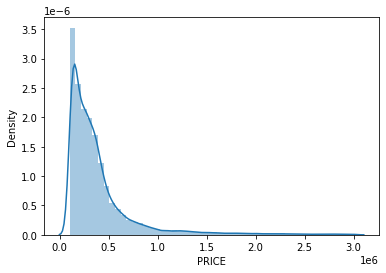

In [180]:
#Here is the distribution of the price data. It's skewed right- which is expected
sns.distplot(single_family['PRICE'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PRICE_LOG', ylabel='Density'>

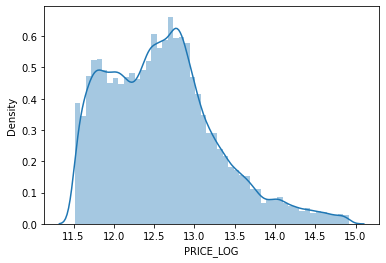

In [91]:
#We transform the price in log form. Price is still skewed but it's better.
sns.distplot(single_family['PRICE_LOG'])

<AxesSubplot:xlabel='AGE', ylabel='Density'>

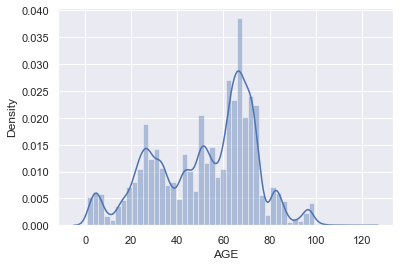

In [206]:
#Age of houses is normally distributed.
sns.set(font_scale=1)
sns.distplot(single_family['AGE'])

<AxesSubplot:xlabel='DAYS_SINCE_SOLD', ylabel='Density'>

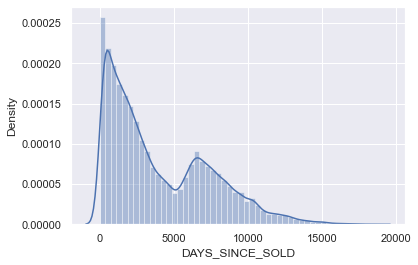

In [207]:
sns.set(font_scale=1)
sns.distplot(single_family['DAYS_SINCE_SOLD'])

In [132]:
last = single_family['PRICE']
single_family = single_family.drop('PRICE',axis=1)
single_family['PRICE'] = last
single_family.head()

,X,Y,FOLIO,ADDRESS,CITY,ZIP_CODE,BEDROOMS,BATHROOMS,HALF_BATHROOMS,FLOORS,UNITS,ACTUAL_AREA,HEATED_AREA,LOT_SIZE,YEAR_BUILT,DOS_1,DATE_SOLD,DAY_OF_SALE,MONTH_OF_SALE,YEAR_OF_SALE,DAYS_SINCE_SOLD,AGE,PRICE
221,25.781325,-80.201086,1.010407e+11,733 NW 4 AVE,Miami,33136,4.0,1.0,0.0,1.0,1.0,1065.0,1065.0,2500.0,1954.0,20190717.0,2019-07-17,17.0,7.0,2019.0,997.0,68.0,200000.0
250,25.780777,-80.203437,1.010409e+11,521 NW 7 ST,Miami,33136,3.0,2.0,0.0,1.0,1.0,1784.0,1455.0,3750.0,1920.0,20190306.0,2019-03-06,6.0,3.0,2019.0,1130.0,102.0,101000.0
741,25.776241,-80.207614,1.020003e+11,227 NW 8 AVE,Miami,33128,2.0,1.0,0.0,1.0,1.0,1170.0,868.0,5000.0,1925.0,20130918.0,2013-09-18,18.0,9.0,2013.0,3125.0,97.0,182300.0
786,25.775025,-80.205978,1.020006e+11,679 NW 1 ST,Miami,33128,5.0,3.0,0.0,2.0,1.0,1179.0,1179.0,2500.0,1925.0,20071001.0,2007-10-01,1.0,10.0,2007.0,5304.0,97.0,310000.0
787,25.774935,-80.205920,1.020006e+11,111 NW 7 AVE,Miami,33128,5.0,3.0,0.0,2.0,1.0,1179.0,1179.0,2500.0,1925.0,20071001.0,2007-10-01,1.0,10.0,2007.0,5304.0,97.0,310000.0


In [175]:
single_family[single_family['YEAR_OF_SALE']==2022]

,X,Y,FOLIO,ADDRESS,CITY,BEDROOMS,BATHROOMS,HALF_BATHROOMS,FLOORS,UNITS,ACTUAL_AREA,HEATED_AREA,LOT_SIZE,YEAR_BUILT,DOS_1,DATE_SOLD,DAY_OF_SALE,MONTH_OF_SALE,YEAR_OF_SALE,DAYS_SINCE_SOLD,AGE,PRICE,ZIP_CODE_33012,ZIP_CODE_33013,ZIP_CODE_33014,ZIP_CODE_33015,ZIP_CODE_33016,ZIP_CODE_33018,ZIP_CODE_33030,ZIP_CODE_33031,ZIP_CODE_33032,ZIP_CODE_33033,ZIP_CODE_33034,ZIP_CODE_33035,ZIP_CODE_33054,ZIP_CODE_33055,ZIP_CODE_33056,ZIP_CODE_33125,ZIP_CODE_33126,ZIP_CODE_33127,ZIP_CODE_33128,ZIP_CODE_33129,ZIP_CODE_33130,ZIP_CODE_33132,ZIP_CODE_33133,ZIP_CODE_33134,ZIP_CODE_33135,ZIP_CODE_33136,ZIP_CODE_33137,ZIP_CODE_33138,ZIP_CODE_33139,ZIP_CODE_33140,ZIP_CODE_33141,ZIP_CODE_33142,ZIP_CODE_33143,ZIP_CODE_33144,ZIP_CODE_33145,ZIP_CODE_33146,ZIP_CODE_33147,ZIP_CODE_33149,ZIP_CODE_33150,ZIP_CODE_33154,ZIP_CODE_33155,ZIP_CODE_33156,ZIP_CODE_33157,ZIP_CODE_33158,ZIP_CODE_33160,ZIP_CODE_33161,ZIP_CODE_33162,ZIP_CODE_33165,ZIP_CODE_33166,ZIP_CODE_33167,ZIP_CODE_33168,ZIP_CODE_33169,ZIP_CODE_33170,ZIP_CODE_33172,ZIP_CODE_33173,ZIP_CODE_33174,ZIP_CODE_33175,ZIP_CODE_33176,ZIP_CODE_33177,ZIP_CODE_33178,ZIP_CODE_33179,ZIP_CODE_33180,ZIP_CODE_33181,ZIP_CODE_33182,ZIP_CODE_33183,ZIP_CODE_33184,ZIP_CODE_33185,ZIP_CODE_33186,ZIP_CODE_33187,ZIP_CODE_33189,ZIP_CODE_33190,ZIP_CODE_33193,ZIP_CODE_33194,ZIP_CODE_33196
1898,25.851278,-80.194234,1.311201e+11,150 NE 83 ST,Miami,3.0,1.0,0.0,1.0,1.0,941.0,941.0,5000.0,1940.0,20220211.0,2022-02-11,11.0,2.0,2022.0,57.0,82.0,399000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2192,25.845820,-80.203765,1.311202e+11,7726 NW 4 AVE,Miami,3.0,1.0,0.0,1.0,1.0,1136.0,895.0,7390.5,1930.0,20220126.0,2022-01-26,26.0,1.0,2022.0,73.0,92.0,175000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2281,25.842439,-80.202445,1.311202e+11,7321 NW 3 AVE,Miami,2.0,1.0,0.0,1.0,1.0,596.0,572.0,3140.0,1954.0,20220106.0,2022-01-06,6.0,1.0,2022.0,93.0,68.0,130000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2643,25.846423,-80.202886,1.311205e+11,7810 NW 3 AVE,Miami,1.0,1.0,0.0,1.0,1.0,1582.0,1484.0,5000.0,1947.0,20220113.0,2022-01-13,13.0,1.0,2022.0,86.0,75.0,220000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2983,25.836852,-80.196155,1.311301e+11,6725 N MIAMI AVE,Miami,3.0,2.0,0.0,1.0,1.0,2088.0,1964.0,7920.0,1950.0,20220210.0,2022-02-10,10.0,2.0,2022.0,58.0,72.0,412000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570403,25.577309,-80.352630,3.660080e+12,9910 CARIBBEAN BLVD,Cutler Bay,3.0,1.0,0.0,1.0,1.0,1458.0,1046.0,9350.0,1959.0,20220216.0,2022-02-16,16.0,2.0,2022.0,52.0,63.0,364000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
571055,25.568599,-80.353365,3.660080e+12,9950 SW 213 TER,Cutler Bay,2.0,1.0,0.0,1.0,1.0,863.0,863.0,7500.0,1960.0,20220125.0,2022-01-25,25.0,1.0,2022.0,74.0,62.0,131000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
572184,25.578527,-80.341579,3.660090e+12,9260 NAUTILUS DR,Cutler Bay,3.0,2.0,0.0,1.0,1.0,1869.0,1275.0,825

In [134]:
split_df = np.array_split(single_family,2)
split_df[1]

,X,Y,FOLIO,ADDRESS,CITY,ZIP_CODE,BEDROOMS,BATHROOMS,HALF_BATHROOMS,FLOORS,UNITS,ACTUAL_AREA,HEATED_AREA,LOT_SIZE,YEAR_BUILT,DOS_1,DATE_SOLD,DAY_OF_SALE,MONTH_OF_SALE,YEAR_OF_SALE,DAYS_SINCE_SOLD,AGE,PRICE
288176,25.755293,-80.289923,3.040120e+12,5821 SW 17 ST,Unincorporated County,33155,4.0,2.0,0.0,1.0,1.0,2213.0,1868.0,14134.0,1983.0,19970201.0,1997-02-01,1.0,2.0,1997.0,9198.0,39.0,145000.0
288178,25.755305,-80.289540,3.040120e+12,5801 SW 17 ST,Unincorporated County,33155,3.0,3.0,1.0,1.0,1.0,4874.0,3722.0,14134.0,2015.0,20121217.0,2012-12-17,17.0,12.0,2012.0,3400.0,7.0,250000.0
288180,25.748466,-80.297942,3.040120e+12,6325 SW 24 ST,Unincorporated County,33155,3.0,2.0,0.0,1.0,1.0,1725.0,1124.0,7000.0,1964.0,20030701.0,2003-07-01,1.0,7.0,2003.0,6857.0,58.0,240000.0
288184,25.748447,-80.298589,3.040120e+12,6359 CORAL WAY,Unincorporated County,33155,2.0,1.0,0.0,1.0,1.0,928.0,910.0,7000.0,1953.0,20160701.0,2016-07-01,1.0,7.0,2016.0,2108.0,69.0,240000.0
288189,25.748448,-80.299689,3.040120e+12,6425 SW 24 ST,Unincorporated County,33155,3.0,2.0,0.0,1.0,1.0,1533.0,1298.0,11200.0,1950.0,20101108.0,2010-11-08,8.0,11.0,2010.0,4170.0,72.0,343200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575071,25.576518,-80.319552,3.660100e+12,20561 SW 79 CT,Cutler Bay,33189,4.0,4.0,0.0,2.0,1.0,3583.0,2600.0,9750.0,2019.0,20190521.0,2019-05-21,21.0,5.0,2019.0,1054.0,3.0,526100.0
575072,25.576309,-80.319537,3.660100e+12,20581 SW 79 CT,Cutler Bay,33189,5.0,5.0,0.0,2.0,1.0,4346.0,3385.0,10125.0,2020.0,20201207.0,2020-12-07,7.0,12.0,2020.0,488.0,2.0,590000.0
575073,25.576099,-80.319501,3.660100e+12,20601 SW 79 CT,Cutler Bay,33189,5.0,5.0,0.0,2.0,1.0,4346.0,3385.0,11537.0,2019.0,20191216.0,2019-12-16,16.0,12.0,2019.0,845.0,3.0,602700.0
575075,25.575656,-80.319495,3.660100e+12,20641 SW 79 CT,Cutler Bay,33189,4.0,4.0,1.0,2.0,1.0,3682.0,2740.0,10346.0,2019.0,20191115.0,2019-11-15,15.0,11.0,2019.0,876.0,3.0,579900.0


# Regression

In [96]:
single_family.describe()

,X,Y,FOLIO,BEDROOMS,BATHROOMS,HALF_BATHROOMS,FLOORS,UNITS,ACTUAL_AREA,HEATED_AREA,LOT_SIZE,YEAR_BUILT,DOS_1,DAY_OF_SALE,MONTH_OF_SALE,YEAR_OF_SALE,DAYS_SINCE_SOLD,PRICE_LOG,AGE,PRICE
count,152996.000000,152996.000000,1.529960e+05,152996.000000,152996.000000,152996.000000,152996.000000,152996.000000,152996.000000,152996.000000,152996.000000,152996.000000,1.529960e+05,152996.000000,152996.000000,152996.000000,152996.000000,152996.000000,152996.000000,1.529960e+05
mean,25.755823,-80.311563,2.235523e+12,3.309897,2.108768,0.113349,1.119591,1.004366,2399.948718,1994.663207,10371.859588,1970.120265,2.010771e+07,11.542472,6.677037,2010.702744,4041.834277,12.599951,51.879735,3.889740e+05
std,0.126331,0.088431,1.248100e+12,0.842388,0.878943,0.322802,0.330393,0.065932,1094.061107,892.196258,8043.401056,21.784120,9.408027e+04,10.581238,3.352305,9.408443,3441.242562,0.682952,21.784120,3.739750e+05
min,25.396944,-80.554460,1.010407e+11,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1901.000000,1.971030e+07,1.000000,1.000000,1971.000000,26.000000,11.512925,1.000000,1.000000e+05
25%,25.665964,-80.376431,7.211276e+11,3.000000,2.000000,0.000000,1.000000,1.000000,1666.000000,1416.000000,6598.000000,1954.000000,2.004010e+07,1.000000,4.000000,2004.000000,1137.000000,12.061047,33.000000,1.730000e+05
50%,25.747535,-80.313513,3.040120e+12,3.000000,2.000000,0.000000,1.000000,1.000000,2148.000000,1782.000000,8000.000000,1965.000000,2.014071e+07,9.000000,7.000000,2014.000000,2833.000000,12.560244,57.000000,2.850000e+05
75%,25.868805,-80.246260,3.059120e+12,4.000000,2.000000,0.000000,1.000000,1.000000,2827.000000,2316.000000,10800.000000,1989.000000,2.019023e+07,21.000000,10.000000,2019.000000,6673.000000,12.983101,68.000000,4.350000e+05
max,25.974915,-80.118765,3.660100e+12,7.000000,7.000000,2.000000,3.000000,2.000000,9977.000000,9977.000000,99839.520000,2021.000000,2.022031e+07,31.000000,12.000000,2022.000000,18667.000000,14.914123,121.000000,3.000000e+06


<AxesSubplot:>

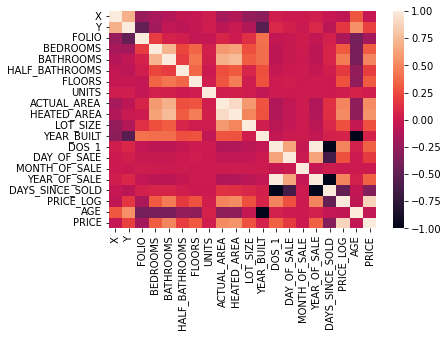

In [54]:
#Heat map

#Price is heavily correlated to bedrooms, bathrooms and area, which is expected.
sns.heatmap(single_family.corr())

In [55]:
#Let's identify our parameters
single_family.describe()

,X,Y,FOLIO,BEDROOMS,BATHROOMS,HALF_BATHROOMS,FLOORS,UNITS,ACTUAL_AREA,HEATED_AREA,LOT_SIZE,YEAR_BUILT,DOS_1,DAY_OF_SALE,MONTH_OF_SALE,YEAR_OF_SALE,DAYS_SINCE_SOLD,PRICE_LOG,AGE,PRICE
count,152996.000000,152996.000000,1.529960e+05,152996.000000,152996.000000,152996.000000,152996.000000,152996.000000,152996.000000,152996.000000,152996.000000,152996.000000,1.529960e+05,152996.000000,152996.000000,152996.000000,152996.000000,152996.000000,152996.000000,1.529960e+05
mean,25.755823,-80.311563,2.235523e+12,3.309897,2.108768,0.113349,1.119591,1.004366,2399.948718,1994.663207,10371.859588,1970.120265,2.010771e+07,11.542472,6.677037,2010.702744,4041.834277,12.599951,51.879735,3.889740e+05
std,0.126331,0.088431,1.248100e+12,0.842388,0.878943,0.322802,0.330393,0.065932,1094.061107,892.196258,8043.401056,21.784120,9.408027e+04,10.581238,3.352305,9.408443,3441.242562,0.682952,21.784120,3.739750e+05
min,25.396944,-80.554460,1.010407e+11,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1901.000000,1.971030e+07,1.000000,1.000000,1971.000000,26.000000,11.512925,1.000000,1.000000e+05
25%,25.665964,-80.376431,7.211276e+11,3.000000,2.000000,0.000000,1.000000,1.000000,1666.000000,1416.000000,6598.000000,1954.000000,2.004010e+07,1.000000,4.000000,2004.000000,1137.000000,12.061047,33.000000,1.730000e+05
50%,25.747535,-80.313513,3.040120e+12,3.000000,2.000000,0.000000,1.000000,1.000000,2148.000000,1782.000000,8000.000000,1965.000000,2.014071e+07,9.000000,7.000000,2014.000000,2833.000000,12.560244,57.000000,2.850000e+05
75%,25.868805,-80.246260,3.059120e+12,4.000000,2.000000,0.000000,1.000000,1.000000,2827.000000,2316.000000,10800.000000,1989.000000,2.019023e+07,21.000000,10.000000,2019.000000,6673.000000,12.983101,68.000000,4.350000e+05
max,25.974915,-80.118765,3.660100e+12,7.000000,7.000000,2.000000,3.000000,2.000000,9977.000000,9977.000000,99839.520000,2021.000000,2.022031e+07,31.000000,12.000000,2022.000000,18667.000000,14.914123,121.000000,3.000000e+06


In [56]:
#X variables to use
#Bedrooms
#Bathrooms
#Half-bathrooms
#Floors
#Units
#Actual area
#Heated area
#Lot size
#Age of building

#Y variable to predict
#Price

In [136]:
#We are encoding our Zip Codes to create binary columns
single_family = pd.get_dummies(single_family, columns=['ZIP_CODE'], drop_first = True)

In [137]:
single_family.head(1)

,X,Y,FOLIO,ADDRESS,CITY,BEDROOMS,BATHROOMS,HALF_BATHROOMS,FLOORS,UNITS,ACTUAL_AREA,HEATED_AREA,LOT_SIZE,YEAR_BUILT,DOS_1,DATE_SOLD,DAY_OF_SALE,MONTH_OF_SALE,YEAR_OF_SALE,DAYS_SINCE_SOLD,AGE,PRICE,ZIP_CODE_33012,ZIP_CODE_33013,ZIP_CODE_33014,ZIP_CODE_33015,ZIP_CODE_33016,ZIP_CODE_33018,ZIP_CODE_33030,ZIP_CODE_33031,ZIP_CODE_33032,ZIP_CODE_33033,ZIP_CODE_33034,ZIP_CODE_33035,ZIP_CODE_33054,ZIP_CODE_33055,ZIP_CODE_33056,ZIP_CODE_33125,ZIP_CODE_33126,ZIP_CODE_33127,ZIP_CODE_33128,ZIP_CODE_33129,ZIP_CODE_33130,ZIP_CODE_33132,ZIP_CODE_33133,ZIP_CODE_33134,ZIP_CODE_33135,ZIP_CODE_33136,ZIP_CODE_33137,ZIP_CODE_33138,ZIP_CODE_33139,ZIP_CODE_33140,ZIP_CODE_33141,ZIP_CODE_33142,ZIP_CODE_33143,ZIP_CODE_33144,ZIP_CODE_33145,ZIP_CODE_33146,ZIP_CODE_33147,ZIP_CODE_33149,ZIP_CODE_33150,ZIP_CODE_33154,ZIP_CODE_33155,ZIP_CODE_33156,ZIP_CODE_33157,ZIP_CODE_33158,ZIP_CODE_33160,ZIP_CODE_33161,ZIP_CODE_33162,ZIP_CODE_33165,ZIP_CODE_33166,ZIP_CODE_33167,ZIP_CODE_33168,ZIP_CODE_33169,ZIP_CODE_33170,ZIP_CODE_33172,ZIP_CODE_33173,ZIP_CODE_33174,ZIP_CODE_33175,ZIP_CODE_33176,ZIP_CODE_33177,ZIP_CODE_33178,ZIP_CODE_33179,ZIP_CODE_33180,ZIP_CODE_33181,ZIP_CODE_33182,ZIP_CODE_33183,ZIP_CODE_33184,ZIP_CODE_33185,ZIP_CODE_33186,ZIP_CODE_33187,ZIP_CODE_33189,ZIP_CODE_33190,ZIP_CODE_33193,ZIP_CODE_33194,ZIP_CODE_33196
221,25.781325,-80.201086,1.010407e+11,733 NW 4 AVE,Miami,4.0,1.0,0.0,1.0,1.0,1065.0,1065.0,2500.0,1954.0,20190717.0,2019-07-17,17.0,7.0,2019.0,997.0,68.0,200000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [139]:
#Let's get the column names. Will be important later.
single_family.columns.values.tolist()

['X',
 'Y',
 'FOLIO',
 'ADDRESS',
 'CITY',
 'BEDROOMS',
 'BATHROOMS',
 'HALF_BATHROOMS',
 'FLOORS',
 'UNITS',
 'ACTUAL_AREA',
 'HEATED_AREA',
 'LOT_SIZE',
 'YEAR_BUILT',
 'DOS_1',
 'DATE_SOLD',
 'DAY_OF_SALE',
 'MONTH_OF_SALE',
 'YEAR_OF_SALE',
 'DAYS_SINCE_SOLD',
 'AGE',
 'PRICE',
 'ZIP_CODE_33012',
 'ZIP_CODE_33013',
 'ZIP_CODE_33014',
 'ZIP_CODE_33015',
 'ZIP_CODE_33016',
 'ZIP_CODE_33018',
 'ZIP_CODE_33030',
 'ZIP_CODE_33031',
 'ZIP_CODE_33032',
 'ZIP_CODE_33033',
 'ZIP_CODE_33034',
 'ZIP_CODE_33035',
 'ZIP_CODE_33054',
 'ZIP_CODE_33055',
 'ZIP_CODE_33056',
 'ZIP_CODE_33125',
 'ZIP_CODE_33126',
 'ZIP_CODE_33127',
 'ZIP_CODE_33128',
 'ZIP_CODE_33129',
 'ZIP_CODE_33130',
 'ZIP_CODE_33132',
 'ZIP_CODE_33133',
 'ZIP_CODE_33134',
 'ZIP_CODE_33135',
 'ZIP_CODE_33136',
 'ZIP_CODE_33137',
 'ZIP_CODE_33138',
 'ZIP_CODE_33139',
 'ZIP_CODE_33140',
 'ZIP_CODE_33141',
 'ZIP_CODE_33142',
 'ZIP_CODE_33143',
 'ZIP_CODE_33144',
 'ZIP_CODE_33145',
 'ZIP_CODE_33146',
 'ZIP_CODE_33147',
 'ZIP_CODE_331

In [146]:
#Separate dataframe by y and x
y = single_family['PRICE']
x = single_family[['BEDROOMS','BATHROOMS',
                   'HALF_BATHROOMS',
                   'FLOORS',
                   'UNITS',
                   'ACTUAL_AREA',
                   'HEATED_AREA',
                   'LOT_SIZE',
                   'AGE',
                   'PRICE',
                  'ZIP_CODE_33012',
 'ZIP_CODE_33013',
 'ZIP_CODE_33014',
 'ZIP_CODE_33015',
 'ZIP_CODE_33016',
 'ZIP_CODE_33018',
 'ZIP_CODE_33030',
 'ZIP_CODE_33031',
 'ZIP_CODE_33032',
 'ZIP_CODE_33033',
 'ZIP_CODE_33034',
 'ZIP_CODE_33035',
 'ZIP_CODE_33054',
 'ZIP_CODE_33055',
 'ZIP_CODE_33056',
 'ZIP_CODE_33125',
 'ZIP_CODE_33126',
 'ZIP_CODE_33127',
 'ZIP_CODE_33128',
 'ZIP_CODE_33129',
 'ZIP_CODE_33130',
 'ZIP_CODE_33132',
 'ZIP_CODE_33133',
 'ZIP_CODE_33134',
 'ZIP_CODE_33135',
 'ZIP_CODE_33136',
 'ZIP_CODE_33137',
 'ZIP_CODE_33138',
 'ZIP_CODE_33139',
 'ZIP_CODE_33140',
 'ZIP_CODE_33141',
 'ZIP_CODE_33142',
 'ZIP_CODE_33143',
 'ZIP_CODE_33144',
 'ZIP_CODE_33145',
 'ZIP_CODE_33146',
 'ZIP_CODE_33147',
 'ZIP_CODE_33149',
 'ZIP_CODE_33150',
 'ZIP_CODE_33154',
 'ZIP_CODE_33155',
 'ZIP_CODE_33156',
 'ZIP_CODE_33157',
 'ZIP_CODE_33158',
 'ZIP_CODE_33160',
 'ZIP_CODE_33161',
 'ZIP_CODE_33162',
 'ZIP_CODE_33165',
 'ZIP_CODE_33166',
 'ZIP_CODE_33167',
 'ZIP_CODE_33168',
 'ZIP_CODE_33169',
 'ZIP_CODE_33170',
 'ZIP_CODE_33172',
 'ZIP_CODE_33173',
 'ZIP_CODE_33174',
 'ZIP_CODE_33175',
 'ZIP_CODE_33176',
 'ZIP_CODE_33177',
 'ZIP_CODE_33178',
 'ZIP_CODE_33179',
 'ZIP_CODE_33180',
 'ZIP_CODE_33181',
 'ZIP_CODE_33182',
 'ZIP_CODE_33183',
 'ZIP_CODE_33184',
 'ZIP_CODE_33185',
 'ZIP_CODE_33186',
 'ZIP_CODE_33187',
 'ZIP_CODE_33189',
 'ZIP_CODE_33190',
 'ZIP_CODE_33193',
 'ZIP_CODE_33194',
 'ZIP_CODE_33196']]

In [147]:
y

221       200000.0
250       101000.0
741       182300.0
786       310000.0
787       310000.0
            ...   
575071    526100.0
575072    590000.0
575073    602700.0
575075    579900.0
575076    549900.0
Name: PRICE, Length: 152996, dtype: float64

In [148]:
x.head()

,BEDROOMS,BATHROOMS,HALF_BATHROOMS,FLOORS,UNITS,ACTUAL_AREA,HEATED_AREA,LOT_SIZE,AGE,PRICE,ZIP_CODE_33012,ZIP_CODE_33013,ZIP_CODE_33014,ZIP_CODE_33015,ZIP_CODE_33016,ZIP_CODE_33018,ZIP_CODE_33030,ZIP_CODE_33031,ZIP_CODE_33032,ZIP_CODE_33033,ZIP_CODE_33034,ZIP_CODE_33035,ZIP_CODE_33054,ZIP_CODE_33055,ZIP_CODE_33056,ZIP_CODE_33125,ZIP_CODE_33126,ZIP_CODE_33127,ZIP_CODE_33128,ZIP_CODE_33129,ZIP_CODE_33130,ZIP_CODE_33132,ZIP_CODE_33133,ZIP_CODE_33134,ZIP_CODE_33135,ZIP_CODE_33136,ZIP_CODE_33137,ZIP_CODE_33138,ZIP_CODE_33139,ZIP_CODE_33140,ZIP_CODE_33141,ZIP_CODE_33142,ZIP_CODE_33143,ZIP_CODE_33144,ZIP_CODE_33145,ZIP_CODE_33146,ZIP_CODE_33147,ZIP_CODE_33149,ZIP_CODE_33150,ZIP_CODE_33154,ZIP_CODE_33155,ZIP_CODE_33156,ZIP_CODE_33157,ZIP_CODE_33158,ZIP_CODE_33160,ZIP_CODE_33161,ZIP_CODE_33162,ZIP_CODE_33165,ZIP_CODE_33166,ZIP_CODE_33167,ZIP_CODE_33168,ZIP_CODE_33169,ZIP_CODE_33170,ZIP_CODE_33172,ZIP_CODE_33173,ZIP_CODE_33174,ZIP_CODE_33175,ZIP_CODE_33176,ZIP_CODE_33177,ZIP_CODE_33178,ZIP_CODE_33179,ZIP_CODE_33180,ZIP_CODE_33181,ZIP_CODE_33182,ZIP_CODE_33183,ZIP_CODE_33184,ZIP_CODE_33185,ZIP_CODE_33186,ZIP_CODE_33187,ZIP_CODE_33189,ZIP_CODE_33190,ZIP_CODE_33193,ZIP_CODE_33194,ZIP_CODE_33196
221,4.0,1.0,0.0,1.0,1.0,1065.0,1065.0,2500.0,68.0,200000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
250,3.0,2.0,0.0,1.0,1.0,1784.0,1455.0,3750.0,102.0,101000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
741,2.0,1.0,0.0,1.0,1.0,1170.0,868.0,5000.0,97.0,182300.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
786,5.0,3.0,0.0,2.0,1.0,1179.0,1179.0,2500.0,97.0,310000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
787,5.0,3.0,0.0,2.0,1.0,1179.0,1179.0,2500.0,97.0,310000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [160]:
#Let's split the data!
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [174]:
x_test

,BEDROOMS,BATHROOMS,HALF_BATHROOMS,FLOORS,UNITS,ACTUAL_AREA,HEATED_AREA,LOT_SIZE,AGE,PRICE,ZIP_CODE_33012,ZIP_CODE_33013,ZIP_CODE_33014,ZIP_CODE_33015,ZIP_CODE_33016,ZIP_CODE_33018,ZIP_CODE_33030,ZIP_CODE_33031,ZIP_CODE_33032,ZIP_CODE_33033,ZIP_CODE_33034,ZIP_CODE_33035,ZIP_CODE_33054,ZIP_CODE_33055,ZIP_CODE_33056,ZIP_CODE_33125,ZIP_CODE_33126,ZIP_CODE_33127,ZIP_CODE_33128,ZIP_CODE_33129,ZIP_CODE_33130,ZIP_CODE_33132,ZIP_CODE_33133,ZIP_CODE_33134,ZIP_CODE_33135,ZIP_CODE_33136,ZIP_CODE_33137,ZIP_CODE_33138,ZIP_CODE_33139,ZIP_CODE_33140,ZIP_CODE_33141,ZIP_CODE_33142,ZIP_CODE_33143,ZIP_CODE_33144,ZIP_CODE_33145,ZIP_CODE_33146,ZIP_CODE_33147,ZIP_CODE_33149,ZIP_CODE_33150,ZIP_CODE_33154,ZIP_CODE_33155,ZIP_CODE_33156,ZIP_CODE_33157,ZIP_CODE_33158,ZIP_CODE_33160,ZIP_CODE_33161,ZIP_CODE_33162,ZIP_CODE_33165,ZIP_CODE_33166,ZIP_CODE_33167,ZIP_CODE_33168,ZIP_CODE_33169,ZIP_CODE_33170,ZIP_CODE_33172,ZIP_CODE_33173,ZIP_CODE_33174,ZIP_CODE_33175,ZIP_CODE_33176,ZIP_CODE_33177,ZIP_CODE_33178,ZIP_CODE_33179,ZIP_CODE_33180,ZIP_CODE_33181,ZIP_CODE_33182,ZIP_CODE_33183,ZIP_CODE_33184,ZIP_CODE_33185,ZIP_CODE_33186,ZIP_CODE_33187,ZIP_CODE_33189,ZIP_CODE_33190,ZIP_CODE_33193,ZIP_CODE_33194,ZIP_CODE_33196
199203,4.0,3.0,0.0,2.0,1.0,4432.0,3557.0,7613.0,22.0,2500000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
155468,3.0,2.0,0.0,2.0,1.0,1608.0,2090.0,6900.0,73.0,705000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
319738,3.0,2.0,0.0,1.0,1.0,2652.0,2064.0,10000.0,55.0,173500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
129635,2.0,1.0,0.0,1.0,1.0,1908.0,1688.0,6250.0,96.0,116000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536562,3.0,1.0,0.0,1.0,1.0,1248.0,1104.0,7875.0,51.0,236000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160159,4.0,2.0,0.0,1.0,1.0,2884.0,1737.0,11000.0,53.0,130800.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
84082,4.0,3.0,0.0,2.0,1.0,4174.0,2683.0,11880.0,65.0,340000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
151894,2.0,1.0,0.0,1.0,1.0,1144.0,1056.0,9101.0,76.0,119000.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
519274,4.0,2.0,0.0,1.0,1.0,3085.0,2112.0,15128.0,49.0,545000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [161]:
#Applying model
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [162]:
#We now have the predicted y values
y_predict =  LR.predict(x_test)
y_predict

array([2500000.,  705000.,  173500., ...,  119000.,  545000.,  320000.])

In [163]:
#R-squared score is above 0.8, meaning we can conduct linear regression!

# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_predict)
print("r2 score is",score)
print("mean_sqrd_error is==",mean_squared_error(y_test,y_predict))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(y_test,y_predict)))

r2 score is 1.0
mean_sqrd_error is== 1.2575011205361317e-18
root_mean_squared error of is== 1.1213835742225458e-09


In [164]:
#Let's get our y-value and slope
intercept=LR.intercept_
coefficients=LR.coef_

intercept

-1.3969838619232178e-09

In [165]:
coefficients

array([ 4.87634966e-10,  9.10616027e-12, -2.63353020e-11, -8.12459581e-10,
       -1.21315131e-09,  4.40750975e-13,  7.43589383e-13, -8.27220189e-15,
        9.87126478e-12,  1.00000000e+00, -1.83408326e-12,  6.46039120e-11,
       -3.90009583e-12,  2.97251025e-11,  5.11755380e-10,  1.98434352e-11,
        8.50607258e-12,  1.23129796e-11,  1.36469349e-11, -5.10373994e-11,
        9.88938025e-12,  3.84296058e-11, -3.15119265e-13,  4.24827974e-12,
        3.00701188e-12, -1.26543132e-11,  2.36862690e-12, -4.16428140e-12,
       -1.32123192e-11, -5.93936558e-12, -9.70532890e-12,  2.04453694e-10,
       -1.48715398e-12, -6.05258833e-12, -8.45265499e-12, -1.02022494e-11,
       -4.41970874e-12, -6.76434406e-12, -7.13554800e-13, -7.72168598e-12,
       -2.41818029e-11,  9.70145586e-13, -3.54925427e-12,  2.24947113e-12,
       -3.70328398e-12, -3.21365865e-12,  2.67419605e-12, -1.08553050e-11,
       -3.67974063e-12,  2.90836838e-13,  1.39197417e-12, -5.82071842e-12,
        6.52377369e-13,  

# Visualizing Regression Model

[(150000.0, 3000000.0)]

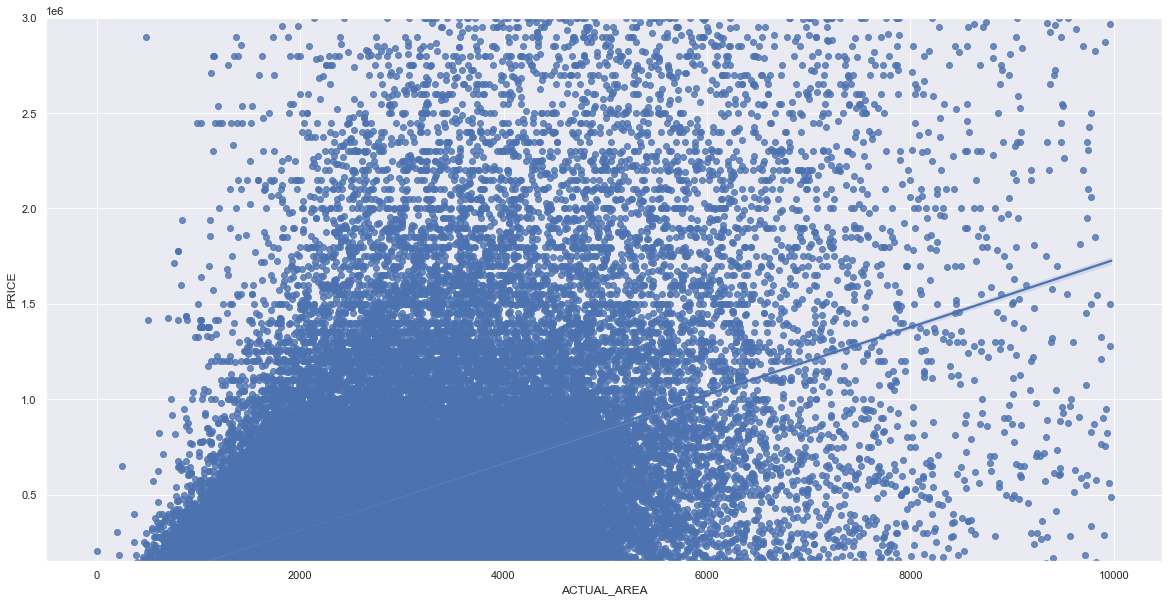

In [202]:
#We can visualize our regression via multiple regression plots.

#Price vs. Area
plt.figure(figsize=(20,10))
sns.set(font_scale=2)
g = sns.regplot(x=single_family['ACTUAL_AREA'],y=single_family['PRICE'])
g.set(ylim=(150000,3000000))

In [187]:
single_family.head()

,X,Y,FOLIO,ADDRESS,CITY,BEDROOMS,BATHROOMS,HALF_BATHROOMS,FLOORS,UNITS,ACTUAL_AREA,HEATED_AREA,LOT_SIZE,YEAR_BUILT,DOS_1,DATE_SOLD,DAY_OF_SALE,MONTH_OF_SALE,YEAR_OF_SALE,DAYS_SINCE_SOLD,AGE,PRICE,ZIP_CODE_33012,ZIP_CODE_33013,ZIP_CODE_33014,ZIP_CODE_33015,ZIP_CODE_33016,ZIP_CODE_33018,ZIP_CODE_33030,ZIP_CODE_33031,ZIP_CODE_33032,ZIP_CODE_33033,ZIP_CODE_33034,ZIP_CODE_33035,ZIP_CODE_33054,ZIP_CODE_33055,ZIP_CODE_33056,ZIP_CODE_33125,ZIP_CODE_33126,ZIP_CODE_33127,ZIP_CODE_33128,ZIP_CODE_33129,ZIP_CODE_33130,ZIP_CODE_33132,ZIP_CODE_33133,ZIP_CODE_33134,ZIP_CODE_33135,ZIP_CODE_33136,ZIP_CODE_33137,ZIP_CODE_33138,ZIP_CODE_33139,ZIP_CODE_33140,ZIP_CODE_33141,ZIP_CODE_33142,ZIP_CODE_33143,ZIP_CODE_33144,ZIP_CODE_33145,ZIP_CODE_33146,ZIP_CODE_33147,ZIP_CODE_33149,ZIP_CODE_33150,ZIP_CODE_33154,ZIP_CODE_33155,ZIP_CODE_33156,ZIP_CODE_33157,ZIP_CODE_33158,ZIP_CODE_33160,ZIP_CODE_33161,ZIP_CODE_33162,ZIP_CODE_33165,ZIP_CODE_33166,ZIP_CODE_33167,ZIP_CODE_33168,ZIP_CODE_33169,ZIP_CODE_33170,ZIP_CODE_33172,ZIP_CODE_33173,ZIP_CODE_33174,ZIP_CODE_33175,ZIP_CODE_33176,ZIP_CODE_33177,ZIP_CODE_33178,ZIP_CODE_33179,ZIP_CODE_33180,ZIP_CODE_33181,ZIP_CODE_33182,ZIP_CODE_33183,ZIP_CODE_33184,ZIP_CODE_33185,ZIP_CODE_33186,ZIP_CODE_33187,ZIP_CODE_33189,ZIP_CODE_33190,ZIP_CODE_33193,ZIP_CODE_33194,ZIP_CODE_33196
221,25.781325,-80.201086,1.010407e+11,733 NW 4 AVE,Miami,4.0,1.0,0.0,1.0,1.0,1065.0,1065.0,2500.0,1954.0,20190717.0,2019-07-17,17.0,7.0,2019.0,997.0,68.0,200000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
250,25.780777,-80.203437,1.010409e+11,521 NW 7 ST,Miami,3.0,2.0,0.0,1.0,1.0,1784.0,1455.0,3750.0,1920.0,20190306.0,2019-03-06,6.0,3.0,2019.0,1130.0,102.0,101000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
741,25.776241,-80.207614,1.020003e+11,227 NW 8 AVE,Miami,2.0,1.0,0.0,1.0,1.0,1170.0,868.0,5000.0,1925.0,20130918.0,2013-09-18,18.0,9.0,2013.0,3125.0,97.0,182300.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
786,25.775025,-80.205978,1.020006e+11,679 NW 1 ST,Miami,5.0,3.0,0.0,2.0,1.0,1179.0,1179.0,2500.0,1925.0,20071001.0,2007-10-01,1.0,10.0,2007.0,5304.0,97.0,310000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
787,25.774935,-80.205920,1.020006e+11,111 NW 7 AVE,Miami,5.0,3.0,0.0,2.0,1.0,1179.0,1179.0,2500.0,1925.0,20071001.0,2007-10-01,1.0,10.0,2007.0,5304.0,97.0,310000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Model Validation

In [166]:
#import packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [171]:
LR.fit(x_train, y_train)
result = LR.score(x_test, y_test)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 100.00%


In [168]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(LR, x_train, y_train, scoring='r2', cv=folds)
scores   

array([1., 1., 1., 1., 1.])